# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2024-25 учебный год

### Домашнее задание №2. Визуализации

Задание выполнил(а):

    Климов Дмитрий

### Общая информация

__Дата выдачи:__ 02.02.2025

__Дедлайн:__ 04:00 09.02.2025

### Оценивание и штрафы

Каждая задача данного домашнего задания оценивается в 2 балла или 4 балла, в зависимости от сложности (балл указан в скобках рядом с номером задачи).

Оценка за домашнее задание вычисляется по следующей формуле:

$$
s_{\text{vis}} \times 1/4 ,
$$

где $s_{\text{vis}}$  — количество баллов, которое вы набрали в сумме по всем задачам.

За сдачу домашнего задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 **вторичный** балл в день, но  задержка не может быть больше недели.

__Внимание!__ Домашнее задание выполняется самостоятельно. Не допускается помощь в решении домашнего задания от однокурсников или третьих лиц. «Похожие» решения считаются плагиатом, и все задействованные студенты — в том числе и те, у кого списали, — не могут получить за него больше 0 баллов. Использование в решении домашнего задания генеративных моделей (ChatGPT и так далее) за рамками справочной и образовательной информации для генерации кода задания — считается плагиатом, и такое домашнее задание оценивается в 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/). Необходимо загружать файл с расширением .ipynb (питоновский ноутбук)

Инвайт для подключения к странице курса в системе — указан для каждой группы в нашем телеграмм-канале.

## Раздел 1. Визуализации в датасете кредитного скоринга (14 баллов)

### О задании

В данном разделе вы попрактикуетесь в простейших визуализациях, а также в работе с библиотекой Matplotlib и Seaborn!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Обратите внимание, что во многих задачах раздела вам потребуется написать какой-то текст в виде вывода/результата/итога/какого-то резюме. Пожалуйста, не ленитесь, и пишите выводы ***подробно***, существенная часть баллов будет выставляться именно за выводы, так как в анализе данных они имеют большое значение. Таким образом, на любое задание, сформулированное в виде вопроса, отвечайте текстом, подкрепляя ваши слова написанным и выполненным кодом. Текст выводов/комментариев пишите в отдельных ячейках, используя средства текстового редактора Jupyter Notebook/Google Colab, при необходимости используйте средства *выделения*.

При решении задач, когда вам необходимо сделать какой-то фильтр, срез, выборку, или иное действие с данными, запрещается использовать циклы (`for`, `while`) и оператор `if`.

Кроме того, практически во всех заданиях от вас будет требоваться построить какие-то визуализации и графики. Каждый построенный вами график необходимо красиво оформить — для этого следует как минимум указать его название, а также отметить, что изображено по каждой из осей. Пожалуйста, не пренебрегайте оформлением и стилем ваших визуализаций, поскольку в этом ДЗ эти факторы тоже оцениваются.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()` и другие*

### 1.1. (2 балла)

Начнём с немного тренировочного и разгоночного задания без привязки к реальным данным, а лишь с использованием библиотек Numpy и Matplotlib.

Постройте график функций $sin(x)$ и $cos(x)$ на отрезке от $-\pi$ до $\pi$, используя ровно 100 точек для каждого, а также c легендой и сеткой. Линии графиков покрасьте в разные цвета на ваш выбор; одна из линий должна быть пунктирной.

Результат в данном и последующих заданиях раздела должен получиться примерно как на картинке внизу задания. Содержание подписей не требуется обязательно повторять в точности, как в примере, — однако графики в любом случае должны быть красиво и корректно оформлены.

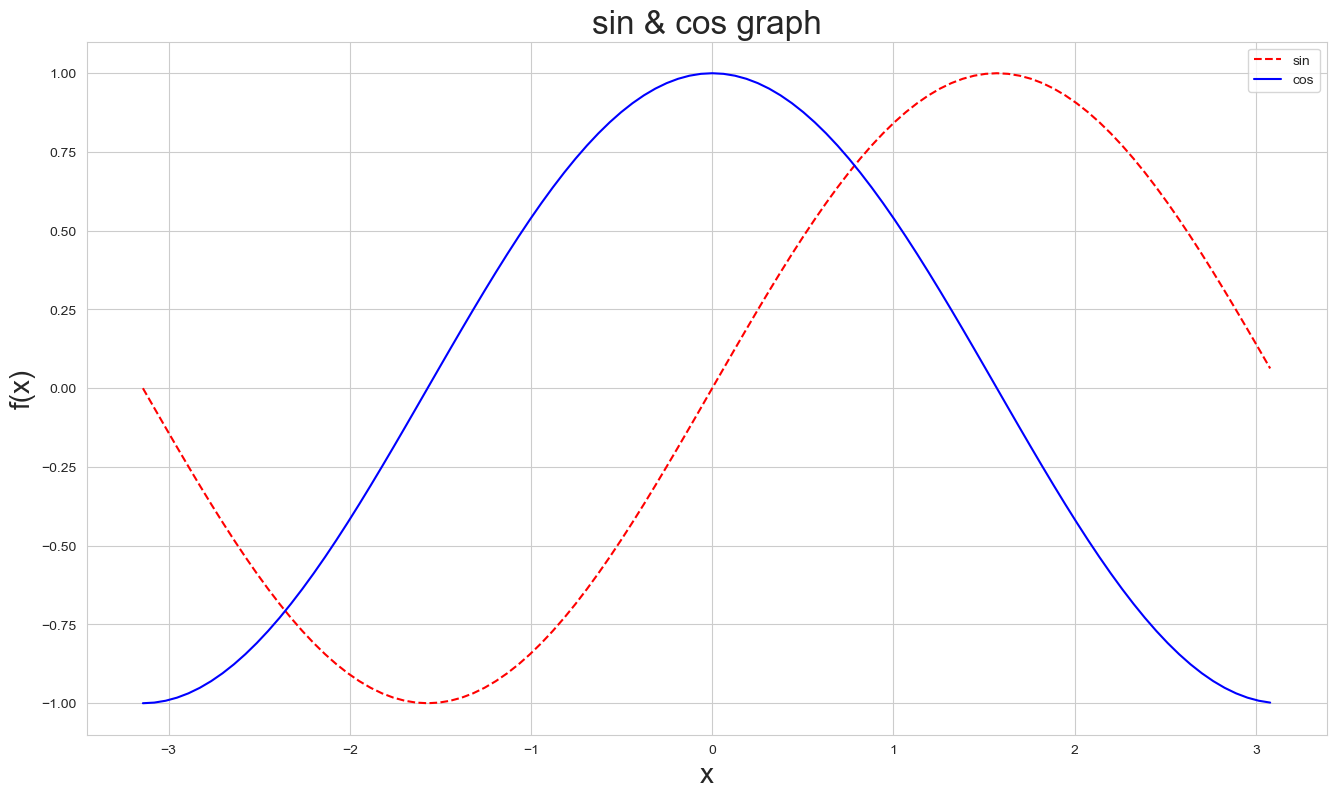

In [3]:
points = np.arange(-np.pi, np.pi, 2*np.pi/100)

sin = np.sin(points)
cos = np.cos(points)

plt.figure(figsize=(16,9))
plt.plot(points, sin, linestyle='--', color='red')
plt.plot(points, cos, color='blue')

plt.title('sin & cos graph', size=24)
plt.xlabel('x', size=20)
plt.ylabel('f(x)', size=20)

plt.legend(['sin', 'cos'])
plt.show()

### 1.2. (2 балла)

Начиная с текущего задания и далее, вы будете работать с задачей кредитного скоринга — оценкой надёжности клиента в банке.

В качестве датасета по этой задаче, вам предоставляются данные о тысяче клиентов, для каждого из которых нам известны около 20 характерестик-признаков, а также целевая переменная в виде положительной или отрицательной оценки в качестве кредитуемого. Именно эти данные вам предстоит исследовать в рамках задач визуализации в данном разделе.

*Описание данных*:

https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit


Считайте и сохраните в программе имеющийся у вас файл с данными кредитного скоринга `german_credit.csv` посредством функций из библиотеки Pandas.

Осуществите сравнение количества положительных и отрицательных исходов в наших данных в зависимости от размера текущего счёта клиента. Для этих целей постройте зеркальные горизонтальные гистограммы.

In [8]:
gc = pd.read_csv('german_credit.csv')
gc.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


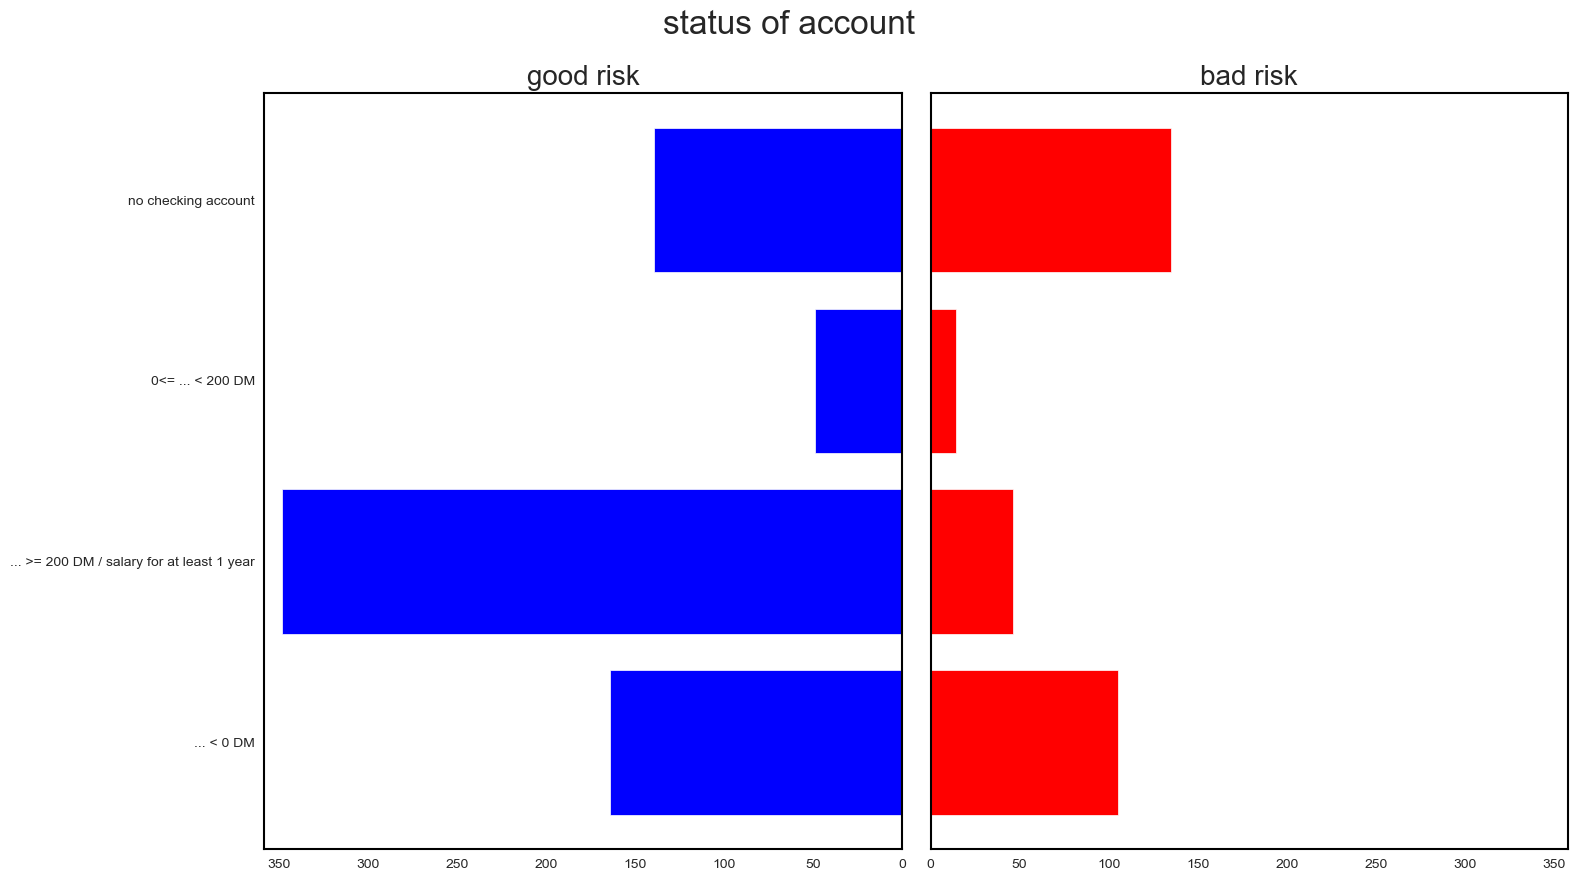

In [116]:
good_cnt = gc[gc["credit_risk"] == "good"]["status"].value_counts().sort_index()
bad_cnt = gc[gc["credit_risk"] == "bad"]["status"].value_counts().sort_index()

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(16,9))
m = max(good_cnt.max(), bad_cnt.max()) + 10

ax1.barh(good_cnt.index, good_cnt.values, color="blue")
ax1.set_xlim([m, 0])
ax1.set_title("good risk", size=20)
ax1.grid(False)

ax2.barh(bad_cnt.index, bad_cnt.values, color="red")
ax2.set_xlim([0, m])
ax2.set_title("bad risk", size=20)
ax2.grid(False)

for ax in (ax1, ax2):
    for s in ax.spines.values():
        s.set_edgecolor("black")
        s.set_linewidth(1.5)

plt.suptitle("status of account", size=24)
plt.tight_layout()
plt.show()

### 1.3. (2 балла)

Теперь постройте гистограмму для сравнения количества положительных и отрицательных исходов в зависимости от размера сберегательного счёта с помощью библиотеки Seaborn.

Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата? Проинтерпретируйте результаты обоих графиков: из текущего и предыдущего задания. Какие выводы можно сделать со стороны бизнеса?

In [62]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 8 ,5

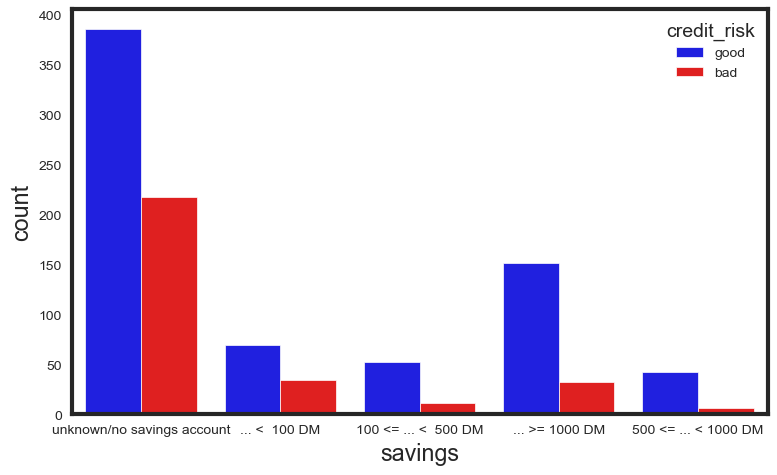

In [121]:
sns.countplot(data=gc, x="savings", hue="credit_risk", palette=["blue","red"])
plt.show()

- очевидно, более короткий и более просто в синтаксисе - seaborn
- с точки зрения восприятия результата оба графика на мой взгляд одинаково понятны, разве что на втором легче понять именно соотношение, в остальном - все персонально
- очень много аккаунтов не имеют сбережений вовсе, немного сбережений имеют люди с хорошим кредитным риском и вдвое меньше с плохим, далее начинают сильно доминировать владельцы аккаунтов с хорошим кредитным риском, особенно промежутке от 500 до 1000 немецких марок, да и в целом говоря о больших сбережениях аккаунтов с плохим кредитным риском сильно сильно меньше

### 1.4.  (2 балла)

Библиотека Seaborn может легко позволить визуализировать ещё больше информации на одном графике.

Давайте для каждого размера сберегательного счёта оценим не только количество положительных и отрицательных исходов, но и, например, распределение соответствующих клиентов по возрасту.

Постройте подходящую визуализацию — не обязательно ту, что представлена на картинке, — и сделайте выводы с точки зрения бизнеса.

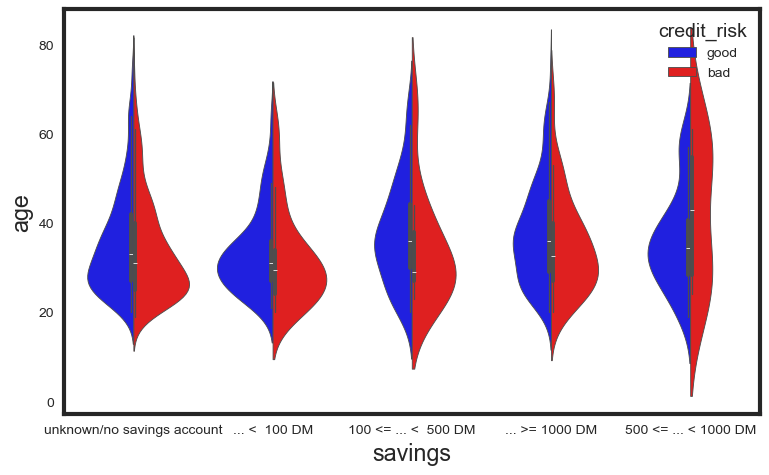

In [120]:
sns.violinplot(data=gc, x="savings", y="age", hue="credit_risk", split=True, palette=["blue","red"])
plt.show()

практически по всем, кроме одного, размерам сбережений наблюдается доминация молодого поколения (до 26-28 лет), и лишь в сбережениях от 500 до 1000 немецких марок владельцы с плохими кредитным риском распределены равномерно, я правда не знаю как это объяснить, простите(( нет никаких мыслей почему так может быть

### 1.5. (2 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных исходов по возрастам, разместив их друг над другом. Добавим также распределение по всем клиентам третьим графиком. Не забудем сделать выводы и проинтерпретировать полученные результаты!

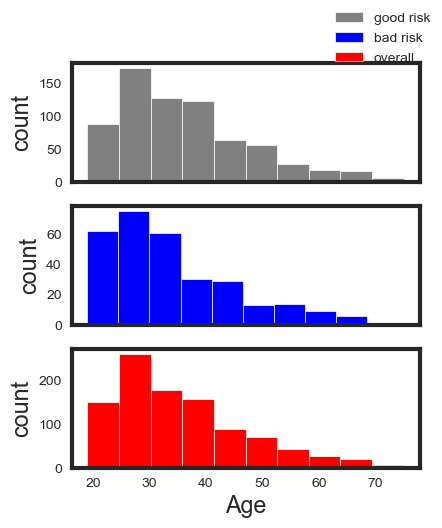

In [118]:
good = gc[gc["credit_risk"]=="good"]
bad = gc[gc["credit_risk"]=="bad"]

fig, axes = plt.subplots(nrows=3, figsize=(4,5), sharex=True)
axes[0].hist(good["age"], color="grey")

axes[1].hist(bad["age"], color="blue")

axes[2].hist(gc["age"], color="red")
axes[2].set_xlabel("Age")

for ax in axes:
    ax.grid(False)
    ax.set_ylabel("count")

fig.legend(["good risk", "bad risk", "overall"])
plt.show()

по сути мы тут ничего нового уже не узнаем особо, тк виолин плоты уже и так дали нам понять, что присутствует доминация молодого поколения до 30 лет

### 1.6. (2 балла)

Не менее полезной визуализацией порой может являться диаграмма рассеяния.

Постройте такую диаграмму, взяв продолжительность и размер кредита в качестве осей. Обозначьте положительные и отрицательные исходы разными цветами. Сделайте выводы.

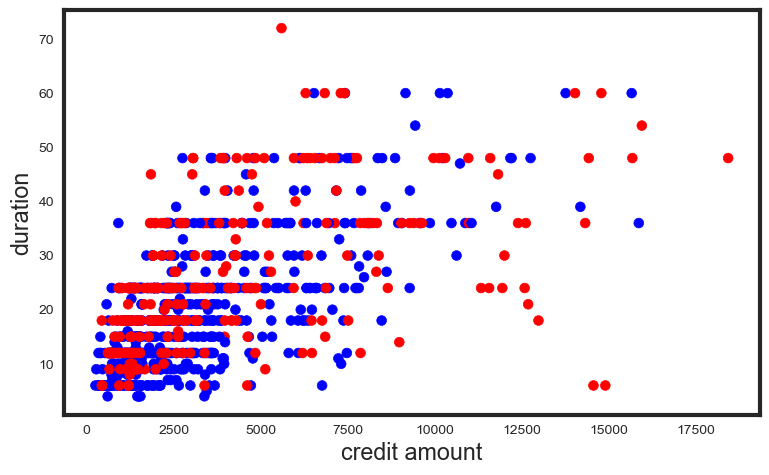

In [119]:
clrs = {"good":"blue", "bad":"red"}
plt.scatter(gc["amount"], gc["duration"], c=gc["credit_risk"].map(clrs))
plt.xlabel("credit amount")
plt.ylabel("duration")
plt.show()

видим, что большая часть кредитов имеет низкие размер и длительность

### 1.7. (2 балла)

Продвинемся немного глубже. Постройте 3D-версию диаграммы рассеяния, добавив ось с возрастом.

Что вы можете сказать о сравнении 3D- и 2D-визуализаций? Какие вы видите в них преимущества и недостатки?

Какие выводы с точки зрения бизнеса можно сделать из полученного графика?

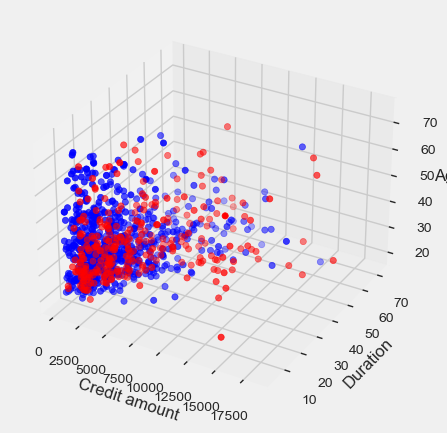

In [75]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for risk in ["good","bad"]:
    subset = gc[gc["credit_risk"] == risk]
    ax.scatter(subset["amount"], subset["duration"], subset["age"], c=clrs[risk])
ax.set_xlabel("Credit amount", size=12)
ax.set_ylabel("Duration", size=12)
ax.set_zlabel("Age", size=12)
plt.show()

да те же самые, что и в предыдущем задании, только еще добавляется то, что большая часть имеет возраст до 30 лет, что мы поняли еще пару заданий назад

## Раздел 2. Визуализации в датасете Netflix (26 баллов)


### О задании

В данном разделе вы продолжите практиковаться в визуализациях и поработаете с более сложными графиками и инструментами.

Все технические рекомендации остаются неизменными с прошлого раздела.

### 2.1.  (2 балла)

В этом разделе мы анализируем с вами датасет по Netflix — да-да, знакомая нам компания, но датасет другой.




Считайте и сохраните в программе имеющийся у вас файл с данными Netflix — `netflix_titles.csv`.

Определите количество пропусков (NaN) в колонке `director` и постройте столбчатую диаграмму, которая показывает 5 стран, содержащих наибольшее количество фильмов с пропусками в столбце `director`.

*Дополнительные требования к визуализации:*

- Заголовок — жирным шрифтом

In [93]:
nt = pd.read_csv('netflix_titles.csv')
nt.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


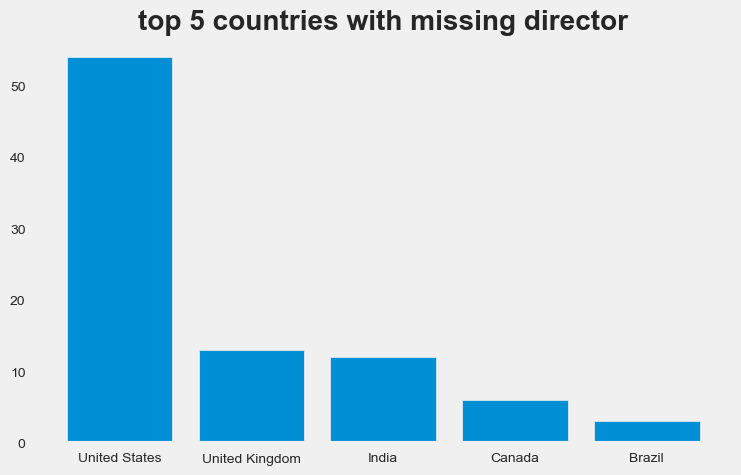

In [81]:
nan_cnt = nt["director"].isna().sum()
countries_missing = nt[(nt["type"] == "Movie") & (nt["director"].isna())].groupby("country")["show_id"].count().nlargest(5)

plt.bar(countries_missing.index, countries_missing.values)
plt.title("top 5 countries with missing director", fontweight="bold")
plt.grid(False)
plt.show()

### 2.2. (2 балла)

Постройте круговую диаграмму (pie chart), показывающую 5 стран, в которых произвели наибольшее количество фильмов.

*Дополнительные требования к визуализации:*

+ Заголовок — шрифтом `'monospace'`; жирный
+ Названия стран — шрифтом `'monospace'`
+ Подписи значений (%) — шрифтом `'monospace'`
+ Стиль диаграммы — `pastel` c помощью библиотеки Seaborn

```colors = sns.color_palette('pastel')[0:5]```

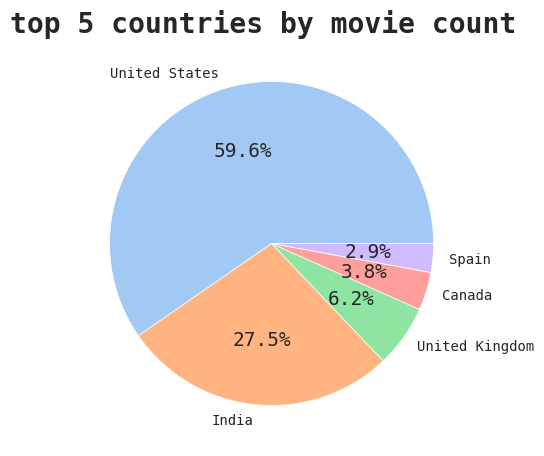

In [85]:
sns.set_style("white")

pal = sns.color_palette("pastel")[:5]
movies_by_country = nt[nt["type"]=="Movie"].groupby("country")["show_id"].count().sort_values(ascending=False).nlargest(5)

plt.pie(movies_by_country.values, labels=movies_by_country.index, autopct="%1.1f%%", colors=pal, textprops={"fontfamily":"monospace"})
plt.title("top 5 countries by movie count ", fontfamily="monospace", fontweight="bold")
plt.show()

### 2.3. (4 балла)

Постройте subplots, где на первых осях (на первом графике) будет изображена круговая диаграмма, показывающая долю фильмов каждого рейтинга *(rating)*; а на вторых осях — столбчатая диаграмма, визуализирующая 3 страны с наибольшим количеством фильмов с рейтингом TV-MA. При этом, если в каких-то рейтингах фильмов присутствует меньше 50, то такие рейтинги исключаются из рассмотрения в рамках графика.

*Дополнительные требования к визуализации:*

+ Заголовки к диаграммам — жирным шрифтом
+ На круговой диаграмме — подписи значений абсолютные
+ На столбчатой диаграмме — ось Y справа
+ У столбчатой диаграммы — подпись «Количество фильмов» к оси Y и убрана подпись к оси X
+ У столбчатой диаграммы оставить видимыми только правую и нижнюю границы
+ Всю визуализацию (всю конструкцию) реализовать двумя способами: через функциональный и через объектный подход

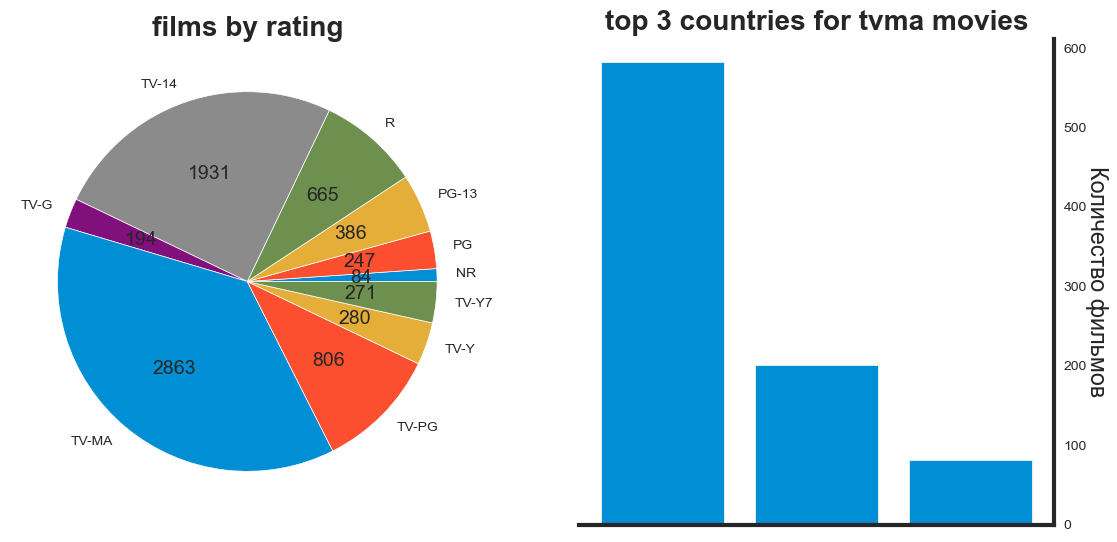

In [88]:
ratings_cnt = nt.groupby("rating")["show_id"].count().reset_index(name="count")
ratings_cnt = ratings_cnt[ratings_cnt["count"] >= 50]

fig = plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.title("films by rating", fontweight="bold")
plt.pie(ratings_cnt["count"],labels=ratings_cnt["rating"],autopct=lambda p: int(round(p * sum(ratings_cnt["count"]) / 100)))

tvma = nt[(nt["rating"]=="TV-MA") & (nt["type"]=="Movie")]
top3 = tvma.groupby("country")["show_id"].count().sort_values(ascending=False).head(3)

plt.subplot(1,2,2)
plt.title("top 3 countries for tvma movies", fontweight="bold")
bars = plt.bar(top3.index, top3.values)
ax = plt.gca()
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")
plt.ylabel("Количество фильмов", rotation=270, labelpad=15)
plt.xticks([])
for s in ["left","top"]:
    ax.spines[s].set_visible(False)
plt.show()

### 2.4. (4 балла)

Преобразуйте колонку `date_added` к типу `datetime`  с помощью средств библиотеки Pandas. Создайте новые признаки: `month` и `year` — из преобразованного столбца. Затем, используя первый полученный признак, постройте линейный график — сколько в среднем фильмов было снято в каждый из месяцев.

*Дополнительные требования к визуализации:*

+ Заголовок — жирным шрифтом
+ Добавлены маркеры на точках перегиба
+ Настроена ось X: ось начинается с 1; заканчивается на 12; шаг 1

Сделайте выводы с точки зрения бизнеса.

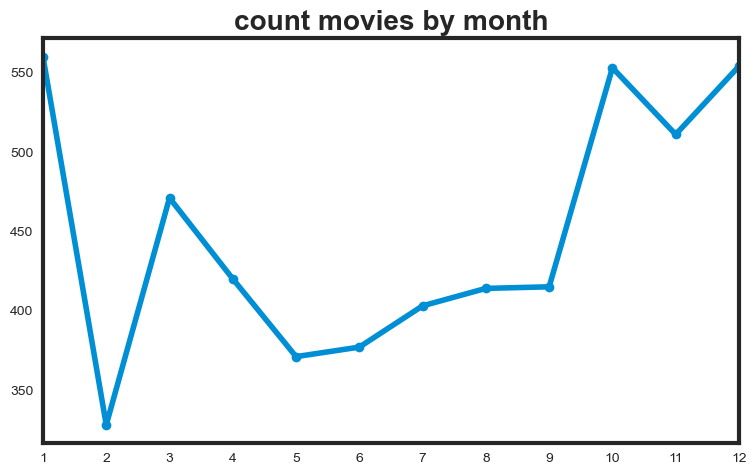

In [91]:
nt["date_added"] = pd.to_datetime(nt["date_added"].str.strip(), format="%B %d, %Y", errors="coerce")
nt["month"] = nt["date_added"].dt.month
nt["year"] = nt["date_added"].dt.year

movies_per_month = nt[nt["type"]=="Movie"].groupby("month")["show_id"].count()

plt.figure()
plt.plot(movies_per_month.index, movies_per_month.values, marker="o")
plt.xticks(range(1,13))
plt.xlim(1,12)
plt.title("count movies by month", fontweight="bold")
plt.show()

видим, что особо много фильмов выходит в начале и конце года, после начала - просадок, затем среднее, и потом к концу года снова рост

### 2.5. (2 балла)

Используя второй созданный признак из предыдущего задания, постройте линейный график — динамика количества снятых фильмов по годам.

*Дополнительные требования к визуализации:*

+ Заголовок — жирным шрифтом
+ График — изменен цвет; линия графика представлена пунктиром
+ Добавлена решётка на фон

Сделайте выводы с точки зрения бизнеса.

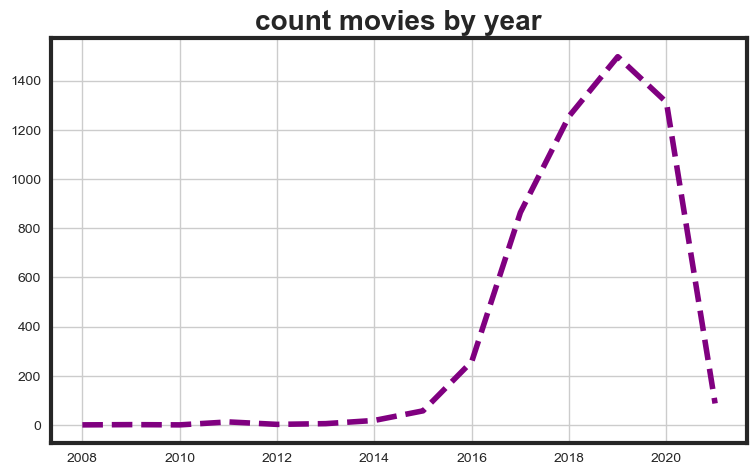

In [92]:
movies_per_year = nt[nt["type"]=="Movie"].groupby("year")["show_id"].count()

plt.figure()
plt.plot(movies_per_year.index, movies_per_year.values, linestyle="--", color="purple")
plt.title("count movies by year", fontweight="bold")
plt.grid(True)
plt.show()

до 2014 года фильмов будто бы вообще не было, затем наблюдается нелинейный рост их количества до 2019 года, в 2020 - спад

### 2.6. (4 балла)

В этом и последующих заданиях будем работать со столбцом `duration`. Одни данные в столбце даны в минутах (для фильмов (`Movie`)); другие — в сезонах (для сериалов (`TV shows`)). В связи с этим создайте два новых столбца: `minutes` — для тех, у кого продолжительность в минутах, — и `season` — для тех, у кого продолжительность в сезонах. Заполните эти столбцы на основе исходного признака `duration`.

Постройте subplots, где на первых осях (на первом графике) будет изображена гистограмма распределения продолжительности фильмов; а на вторых осях — гистограмма распределения продолжительности сериалов.

*Дополнительные требования к визуализации:*

+ Заголовки к гистограммам — жирным шрифтом
+ Всю визуализацию (всю конструкцию) реализовать двумя способами: через функциональный и через объектный подход

Сделайте выводы с точки зрения бизнеса.

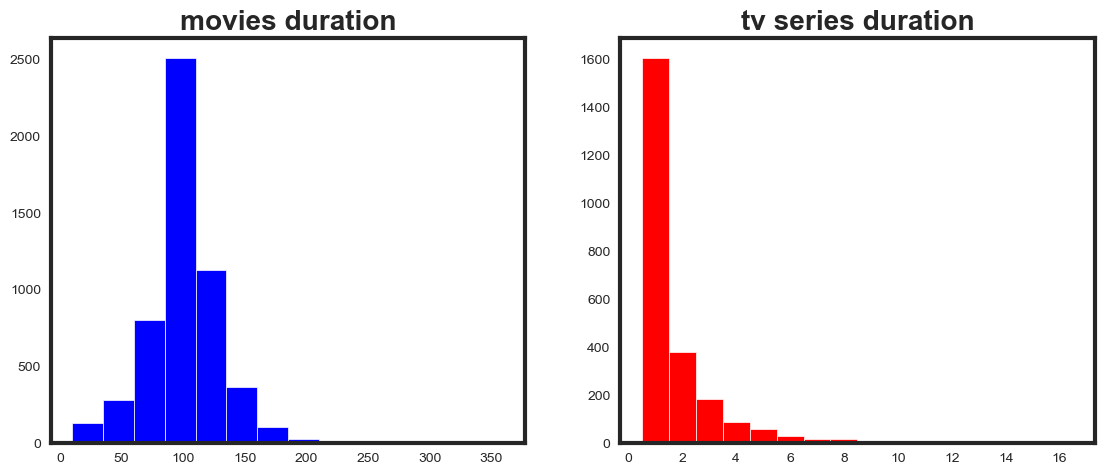

In [101]:
nt["minutes"] = nt.apply(lambda x: int(x["duration"].split(" ")[0]) if x["type"]=="Movie" else np.nan, axis=1)
nt["season"] = nt.apply(lambda x: int(x["duration"].split(" ")[0]) if x["type"]=="TV Show" else np.nan, axis=1)

movies_dur = nt[nt["type"] == "Movie"]["minutes"].dropna()
tvseries_dur = nt[nt["type"] == "TV Show"]["season"].dropna()

# функциональный 
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.hist(movies_dur, bins=range(10, int(movies_dur.max()) + 50, 25), color="blue")
plt.title("movies duration", fontweight="bold")

plt.subplot(1,2,2)
plt.hist(tvseries_dur, bins=range(1, int(tvseries_dur.max()) + 2), color="red", align="left")
plt.title("tv series duration", fontweight="bold")

plt.show()

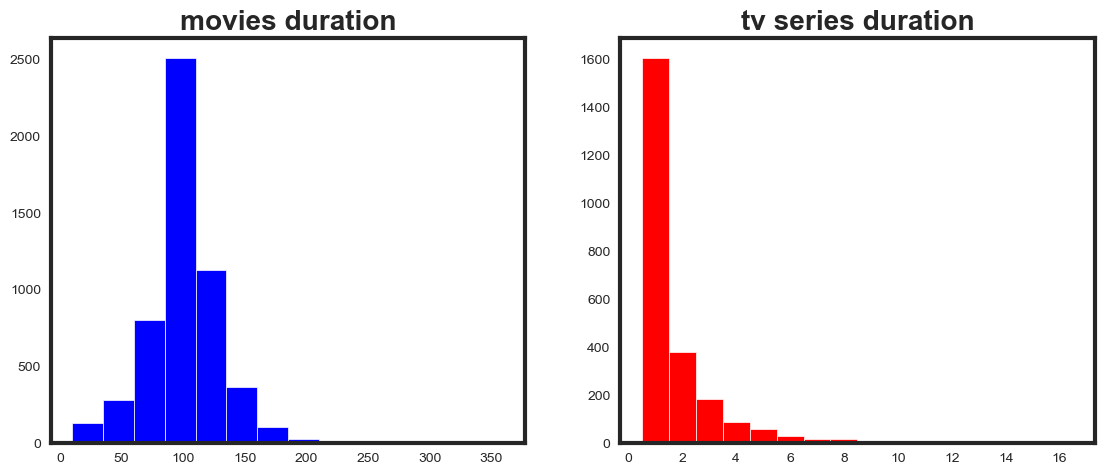

In [104]:
# объектно-ориентированный
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))

ax1.hist(movies_dur, bins=range(10, int(movies_dur.max()) + 50, 25), color="blue")
ax1.set_title("movies duration", fontweight="bold")

ax2.hist(tvseries_dur, bins=range(1, int(tvseries_dur.max()) + 2), color="red", align="left")
ax2.set_title("tv series duration", fontweight="bold")

plt.show()

примерно половина фильмов имеет среднюю продолжительность 100 минут, а самое частое кол-во сезонов в сериалах - 1, примерно 80%

### 2.7. (2 балла)

Постройте ящик с усами (box plot) по продолжительности фильмов. Проинтерпретируйте его.

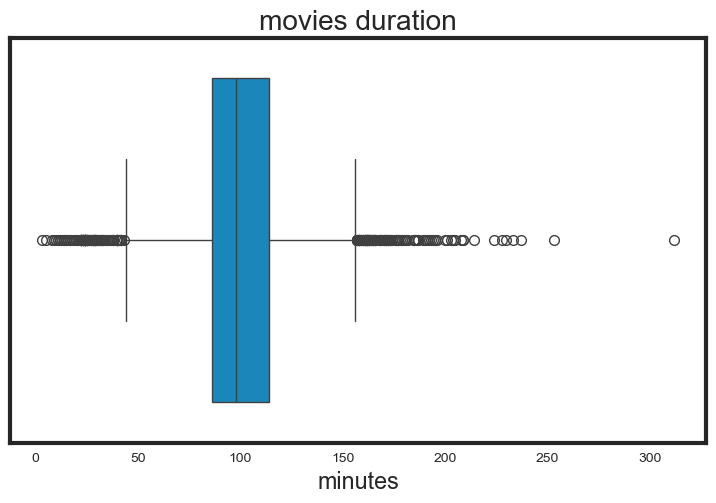

In [105]:
sns.boxplot(x=movies_dur)
plt.title("movies duration")
plt.show()

видим очень много выбросов, прям реально много, медиана как я и говорил выше - 100, границы - 45 и 155 где то

## Задание повышенной сложности по библиотеке Plotly (6 баллов)

После тренировки с базовыми библиотеками, попробуем построить визуализацию с помощью Plotly.

In [107]:
import plotly.express as px

### 2.8. (6 баллов)

Постройте при помощи библиотеки Plotly интерактивную столбчатую диаграмму, которая сравнивает среднюю продолжительность фильмов и сериалов за каждый год, начиная с 2000.

In [111]:
nt_2000 = nt[nt["release_year"] >= 2000].copy()
nt_2000["duration_numeric"] = nt_2000["duration"].apply(lambda x: int(x.split(" ")[0]))

avg_dur = nt_2000.groupby(["release_year","type"])["duration_numeric"].mean().reset_index()

fig = px.bar(avg_dur,x="release_year", y="duration_numeric", color="type", barmode="group", labels={"release_year":"year", "duration_numeric":"average duration"})
fig.update_layout(title="average duration of movies and tv series after 2000")
fig.show()

Сравнивать не очень удобно, тк разные единицы измерения, но раз надо - значит надо)